![image.png](https://i.imgur.com/a3uAqnb.png)

# **📌 Custom Dataset Class & Image Augmentations**
---

## **Working with Ready-to-Use Datasets**
So far, we've worked with **ready-to-use datasets** like:
```python
from torchvision.datasets import MNIST, CIFAR10
train_dataset = MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
```
These datasets are predefined in PyTorch, and we don't need to worry about loading images manually.

## **What If We Have Raw Images in a Folder?**
What if we have: 
-  Images inside a folder?
-  Raw images without predefined labels?
-  Custom datasets collected manually?

How do we load and prepare them for a PyTorch model?

#### Let's start with this dataset. It is about Flowers Recognition:

In [1]:
# # Please uncomment this out when you are running this lab on google colab!
# import os

# # Set KaggleHub cache to a directory inside /content/
# os.environ["KAGGLEHUB_CACHE"] = "/content/data"

In [23]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'flowers-recognition' dataset.
Path to dataset files: /kaggle/input/flowers-recognition


## **📁 Understanding Dataset Structure**

Before working with a dataset, it's helpful to **visualize its folder structure** and understand how files are organized.

Let's display the directory tree:

    Display the directory structure in a tree format.
    
    Args:
        path (str): Root directory path to visualize
        max_depth (int): Maximum depth to explore (default: 2)
        prefix (str): Prefix for tree branches (used internally)
        current_depth (int): Current depth level (used internally)
    
    Example:
        show_directory_structure("./data/flowers", max_depth=2)


In [24]:
import os

def show_directory_structure(path, max_depth=2, prefix="", current_depth=0):


    if current_depth > max_depth:
        return
    
    # Get all items in the directory
    items = sorted(os.listdir(path))
    
    # Separate folders and files
    folders = [item for item in items if os.path.isdir(os.path.join(path, item))]
    files = [item for item in items if os.path.isfile(os.path.join(path, item))]
    
    # Display folders first, then files
    all_items = folders + files
    
    for i, item in enumerate(all_items):
        is_last = (i == len(all_items) - 1)
        item_path = os.path.join(path, item)
        
        # Choose the correct branch character
        branch = "└── " if is_last else "├── "
        
        if os.path.isdir(item_path):
            # Count files in directory
            file_count = len([f for f in os.listdir(item_path) 
                            if os.path.isfile(os.path.join(item_path, f))])
            print(f"{prefix}{branch} {item}/ ({file_count} files)")
            
            # Recursively show subdirectories
            extension = "    " if is_last else "│   "
            show_directory_structure(item_path, max_depth, prefix + extension, current_depth + 1)
        else:
            print(f"{prefix}{branch} {item}")


# 🔹 Example: Show the flowers dataset structure
print("📂 Dataset Structure:")
print(f" {os.path.basename(path)}/")
show_directory_structure(os.path.join(path, "flowers"), max_depth=1)

📂 Dataset Structure:
 flowers-recognition/
├──  daisy/ (764 files)
│   ├──  100080576_f52e8ee070_n.jpg
│   ├──  10140303196_b88d3d6cec.jpg
│   ├──  10172379554_b296050f82_n.jpg
│   ├──  10172567486_2748826a8b.jpg
│   ├──  10172636503_21bededa75_n.jpg
│   ├──  102841525_bd6628ae3c.jpg
│   ├──  10300722094_28fa978807_n.jpg
│   ├──  1031799732_e7f4008c03.jpg
│   ├──  10391248763_1d16681106_n.jpg
│   ├──  10437754174_22ec990b77_m.jpg
│   ├──  10437770546_8bb6f7bdd3_m.jpg
│   ├──  10437929963_bc13eebe0c.jpg
│   ├──  10466290366_cc72e33532.jpg
│   ├──  10466558316_a7198b87e2.jpg
│   ├──  10555749515_13a12a026e.jpg
│   ├──  10555815624_dc211569b0.jpg
│   ├──  10555826524_423eb8bf71_n.jpg
│   ├──  10559679065_50d2b16f6d.jpg
│   ├──  105806915_a9c13e2106_n.jpg
│   ├──  10712722853_5632165b04.jpg
│   ├──  107592979_aaa9cdfe78_m.jpg
│   ├──  10770585085_4742b9dac3_n.jpg
│   ├──  10841136265_af473efc60.jpg
│   ├──  10993710036_2033222c91.jpg
│   ├──  10993818044_4c19b86c82.jpg
│   ├──  10994032453

✅ **Now you can easily explore any dataset structure before writing code!**

💡 **Tip**: Use `max_depth` parameter to control how deep you want to explore:
- `max_depth=1` → Only top-level folders
- `max_depth=2` → Include subfolders
- `max_depth=3` → Full structure

---

## **1️⃣ First Step: How to Read an Image?**
Before working with a dataset, we need to know how to **read a single image**.

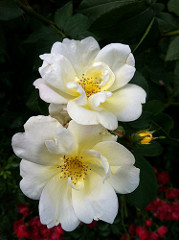

In [25]:
### *📌 Loading Images Using PIL (Pillow)*
### Pillow (`PIL`) is a common Python library for handling images.
from PIL import Image
import os

# Load an image 
image_path = os.path.join(path,"flowers/rose/10090824183_d02c613f10_m.jpg")
image = Image.open(image_path)

# Display the image
image

## **2️⃣ Second Step: Finding Paths of All Images in a Folder**
To load an entire dataset, we need a **list of all image paths** inside a folder. 

This could be achieved by glob.

In [26]:
import glob
folder_path = os.path.join(path, "flowers", "daisy", "*.jpg") 

# Get paths of all .jpg images
image_files = glob.glob(folder_path)
print(image_files[:5])

['/kaggle/input/flowers-recognition/flowers/daisy/34670512115_af22cce24d_n.jpg', '/kaggle/input/flowers-recognition/flowers/daisy/8882282142_9be2524d38_m.jpg', '/kaggle/input/flowers-recognition/flowers/daisy/19280272025_57de24e940_m.jpg', '/kaggle/input/flowers-recognition/flowers/daisy/5133243796_44de429de5_m.jpg', '/kaggle/input/flowers-recognition/flowers/daisy/34695914906_961f92ffcd_n.jpg']


✅ **Now we have the full path for each image!**

## **3️⃣ Third Step: How to convert these images to tensors?**
PyTorch models require **tensors**, not raw images.  
To convert an image to a tensor, we use **`transforms.ToTensor()`**.

In [27]:
from torchvision import transforms

# Define transformation
transform = transforms.ToTensor()

# Load and convert image
image = Image.open(image_files[0])
image_tensor = transform(image)

# Show tensor shape
print(image_tensor.shape)  # (Channels, Height, Width)

torch.Size([3, 240, 159])


### ✅ **Great! This should be ready to be fed into a model, right?**  
####  **Sorry, life is not that easy.🫠** 

## **📌 Do All Images Have the Same Shape?**
Before passing images to a model, we must ensure:
- **All images have the same size** (Height and Width)
- **No missing channels** (e.g., grayscale vs. RGB)

In [28]:
# Check shape of multiple images
for image_path in image_files[:5]:  # Check first 5 images
    img = Image.open(image_path)
    print(f"Image: {image_path}, Shape: {img.size}")  # Prints (Width, Height)

Image: /kaggle/input/flowers-recognition/flowers/daisy/34670512115_af22cce24d_n.jpg, Shape: (159, 240)
Image: /kaggle/input/flowers-recognition/flowers/daisy/8882282142_9be2524d38_m.jpg, Shape: (160, 240)
Image: /kaggle/input/flowers-recognition/flowers/daisy/19280272025_57de24e940_m.jpg, Shape: (240, 240)
Image: /kaggle/input/flowers-recognition/flowers/daisy/5133243796_44de429de5_m.jpg, Shape: (180, 240)
Image: /kaggle/input/flowers-recognition/flowers/daisy/34695914906_961f92ffcd_n.jpg, Shape: (240, 192)


## **📌 Why Do We Need Image Transformations?**
Ok, we can see now that we have to **resize all the images into the same size**.  
Otherwise, models wouldn't work because **they expect fixed input dimensions**.

But resizing is not the only operation we could do!  
We could also:
- **Convert an image to grayscale** 📷  
- **Crop the image** ✂️  
- **Rotate the image** 🔄  
- **Apply brightness adjustments** 💡  
- **Add noise for robustness** 🎭
- For others: https://pytorch.org/vision/0.10/transforms.html

PyTorch provides `torchvision.transforms` to easily apply these transformations.

These transformations, when applied on training data, are often called: **Augmentations**.

Augmentations are **image transformations** applied to:

✅ Improve **generalization** (prevent overfitting).  
✅ Increase **data variability** (expand dataset artificially).  
✅ Improve **robustness** (make the model handle different conditions).


Let's firstly try to resize the images we have above and convert them to grayscale.

In [29]:
from torchvision import transforms

# Define transformation
transform = transforms.Compose([
    transforms.Grayscale(),       # Make all the images gray scale
    transforms.Resize((64, 64)),  # Resize all images to 64x64
    transforms.ToTensor()
])

# Load and convert image
for i in range(10):
    image = Image.open(image_files[i])
    image_tensor = transform(image)
    
    # Show tensor shape
    print(image_tensor.shape)  # (Channels, Height, Width)

torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])


✅ **Now, our images are consistent!**

---

## **Visual Augmentation Gallery**

Let's see what different augmentations actually **look like** when applied to images!

### **Common Augmentations & When to Use Them:**

| Augmentation | What It Does | 
|--------------|--------------|
| **RandomRotation** | Rotates image by random angle | 
| **RandomHorizontalFlip** | Flips image left-right | 
| **ColorJitter** | Changes brightness, contrast, saturation | 
| **RandomCrop** | Crops random portion of image | 
| **RandomResizedCrop** | Crops + resizes to fixed size | 
| **GaussianBlur** | Adds slight blur | 


Let's visualize these transformations side-by-side!

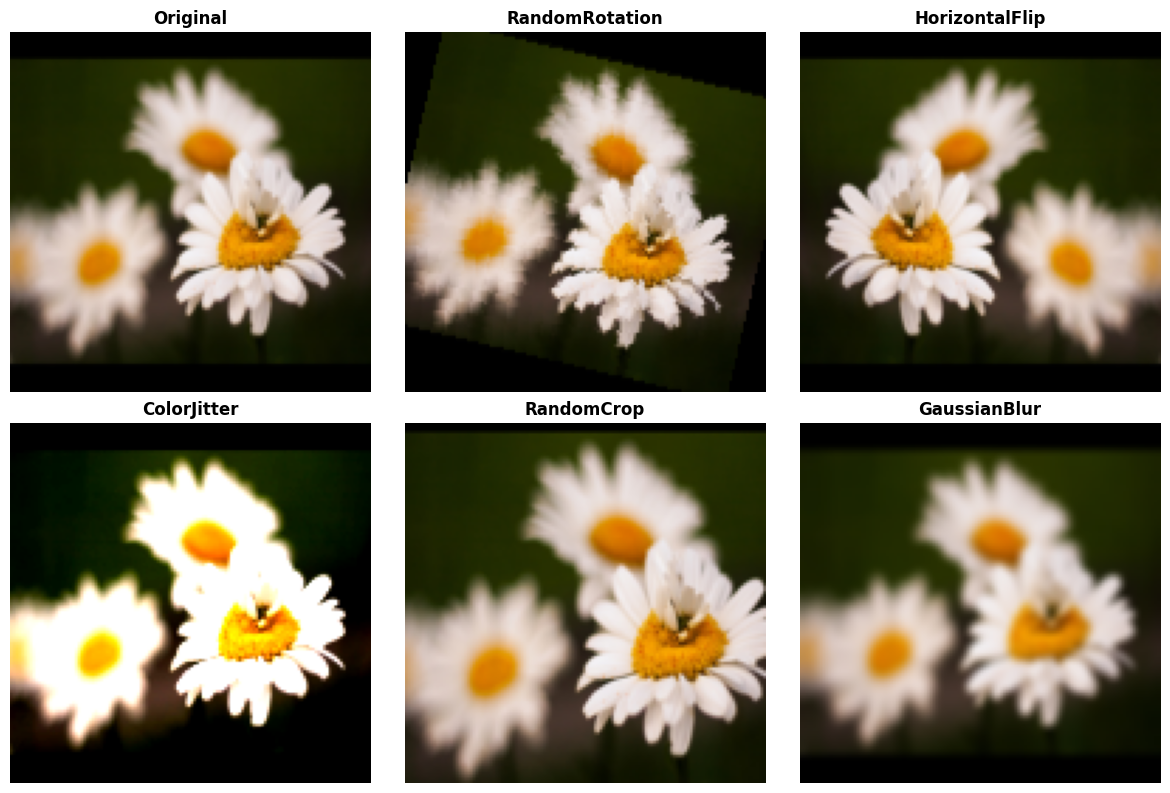

✅ Now you can see how each augmentation affects the image!


In [30]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Load a sample flower image
sample_img = Image.open(image_files[99])

# Define different augmentation transforms
augmentations = {
    "Original": transforms.Compose([transforms.Resize((128, 128))]),
    "RandomRotation": transforms.Compose([transforms.Resize((128, 128)), transforms.RandomRotation(30)]),
    "HorizontalFlip": transforms.Compose([transforms.Resize((128, 128)), transforms.RandomHorizontalFlip(p=1.0)]),
    "ColorJitter": transforms.Compose([transforms.Resize((128, 128)), transforms.ColorJitter(brightness=0.5, contrast=0.5)]),
    "RandomCrop": transforms.Compose([transforms.Resize((150, 150)), transforms.RandomCrop(128)]),
    "GaussianBlur": transforms.Compose([transforms.Resize((128, 128)), transforms.GaussianBlur(kernel_size=5)])
}

# Create a 2x3 grid to display augmentations
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for idx, (name, transform) in enumerate(augmentations.items()):
    augmented_img = transform(sample_img)
    axes[idx].imshow(augmented_img)
    axes[idx].set_title(name, fontsize=12, fontweight='bold')
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

print("✅ Now you can see how each augmentation affects the image!")

# **📌 Let's Work with the Full Dataset**
Now, let's apply what we've learned to the **full dataset**. 

Given you are working with torch, you can make a code for only **One Sample** and it should work for the whole dataset. So let's do that!

---

## **1️⃣ Understanding the Dataset Structure**
We have a **flower classification dataset** stored in the following structure:

```
flowers-recognition/
│── flowers/
│   │── daisy/
│   │── dandelion/
│   │── rose/
│   │── sunflower/
│   │── tulip/
```
Each folder contains images of the respective flower type.

---

## **2️⃣ Assigning Labels to Classes**
We have **5 categories**, so we assign **numerical labels** to them:

| Flower Name   | Label |
|--------------|-------|
| Daisy        | `0`   |
| Dandelion    | `1`   |
| Rose         | `2`   |
| Sunflower    | `3`   |
| Tulip        | `4`   |

#### ✅ **Our goal**: Read each image, apply transformations, and return both the **image** and its **corresponding label**.

---

## **3️⃣ First Step: Get the Paths of Each Class**
Before working with all images, let's focus on **one sample** then just make a loop.

In [31]:
import glob
import os
from PIL import Image
import torchvision.transforms as transforms

# Get all image paths from one category (e.g., Daisy)
category = "daisy"
folder_path = os.path.join(path, "flowers", category, "*.jpg") 
image_paths = glob.glob(folder_path)

# Load one image
sample_image_path = image_paths[0]  # Take the first image
image = Image.open(sample_image_path)  # Open image

# Print original image size and channels
print(f"Original Image Size: {image.size}, Mode: {image.mode}")  # Mode is "RGB" for color images

# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Convert to grayscale
    transforms.Resize((64, 64)),  # Resize to 64x64
    transforms.ToTensor(),  # Convert to tensor
])

# Apply transformations
image_tensor = transform(image)

# Print transformed image shape
print(f"Transformed Image Shape: {image_tensor.shape}")  # (Channels, Height, Width)

# Define class labels
class_labels = {"daisy": 0, "dandelion": 1, "rose": 2, "sunflower": 3, "tulip": 4}
label = class_labels[category]

print(f"Image Label: {label}")  # Output: 0 (Daisy)

Original Image Size: (159, 240), Mode: RGB
Transformed Image Shape: torch.Size([1, 64, 64])
Image Label: 0


#### ✅ **Now, we have an image and its corresponding label!**  

# **📌 From Single Image Processing to a Dataset Class**
In the previous step, we **converted one image** from a raw format into a **model-ready tensor** with a label.

✅ But we don’t want to do this manually for every image.  
✅ Instead, we should **automate** this process inside `__getitem__()` in a **Dataset Class**.


---

# **📌 Let's See How a Dataset Class Looks**
A PyTorch Dataset class typically consists of **three main functions**:

| Function       | Purpose |
|---------------|------------------------------------------------|
| `__init__()`  | Loads all image paths & stores class labels. |
| `__len__()`   | Returns the total number of images. |
| `__getitem__()` | Loads, processes, and returns one image & label. |


#### Essentially, what we wrote earlier **should now go inside `__getitem__()`!**  

In [32]:
### **🔹 General Structure of a Dataset Class**
from torch.utils.data import Dataset
from PIL import Image
import glob

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir  # Dataset path
        self.transform = transform  # Transformations
        self.class_labels = {"daisy": 0, "dandelion": 1, "rose": 2, "sunflower": 3, "tulip": 4}

        # Get all image paths
        self.image_paths = []
        self.labels = []
        for class_name, label in self.class_labels.items():
            class_images = glob.glob(f"{root_dir}/{class_name}/*.jpg")  # Find all images
            self.image_paths.extend(class_images)
            self.labels.extend([label] * len(class_images))  # Assign labels

    def __len__(self):
        return len(self.image_paths)  # Total number of images

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]  # Get image path
        label = self.labels[idx]  # Get label
        
        # Load image using PIL
        image = Image.open(image_path)

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, label  # Return processed image & label

In [33]:
# Define transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Grayscale
    transforms.Resize((64, 64)),  # Resize all images to 64x64
    transforms.ToTensor(),  # Convert image to tensor
])

# Initialize it
dataset = CustomDataset(root_dir=os.path.join(path, "flowers") ,
                       transform=transform)

#### ✅ Now, **every time we call `dataset[idx]`, it will return an image & label, processed automatically!**  

---

# **📌 But Wait... This Reads One Image at a Time!**
Right now, our **Dataset Class** loads **one image at a time** when we call:
```python
image, label = dataset[0]  # Loads only one image
```
✅ **That’s great for understanding**, but when training a model, we need to process **multiple images at once** for efficiency.

❌ **Problem**: We need batches, not single images.  
✅ **Solution**: We use `DataLoader` to handle batching automatically.

# **📌 Introducing `DataLoader`**
A **DataLoader** helps in:
- **Batching**: Groups multiple samples together for faster processing.
- **Shuffling**: Randomizes data order to improve training.
- **Multi-threading**: Loads data efficiently in parallel.

| **Argument**     | **Description** |
|-----------------|---------------|
| `dataset` | The dataset object (e.g., `train_dataset`) |
| `batch_size` | Number of samples per batch (e.g., `32`) |
| `shuffle` | Whether to **randomly shuffle** data each epoch (`True` = better for training) |
| `num_workers` | Number of parallel **CPU workers** to load data faster |
| `collate_fn` | A function to **customize how data is stacked** (useful when data has variable sizes) |


![image.png](https://i.imgur.com/aHE3lnE.png)

In [34]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 32

# Create DataLoader
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get a batch of training images
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels}")

Batch shape: torch.Size([32, 1, 64, 64]), Labels: tensor([0, 4, 0, 4, 2, 4, 1, 3, 4, 2, 4, 4, 4, 0, 1, 4, 3, 4, 4, 0, 3, 1, 4, 2,
        4, 0, 2, 2, 4, 4, 1, 1])


#### ✅ **Now, instead of reading one image at a time, we process an entire batch! This can be now fed into a model.**

## ⚠️ **Common Issue: Uneven Batch Sizes**

### **Problem:**
When your dataset size is **not perfectly divisible** by `batch_size`, the **last batch will be smaller**.

**Example:**
```python
dataset_size = 1000
batch_size = 32

# Number of batches:
# Batch 1-31: 32 samples each (31 × 32 = 992 samples)
# Batch 32: 8 samples only! (1000 - 992 = 8 samples)
```

### **Why This Causes Errors:**
Some models (especially with **Batch Normalization**) expect **consistent batch sizes** and will crash when they encounter a smaller last batch.

**Common error message:**
```
RuntimeError: Expected more than 1 value per channel when training
```

### **✅ Solution: Drop the Last Incomplete Batch**

Simply add `drop_last=True` to your DataLoader:

```python
train_loader = DataLoader(
    dataset, 
    batch_size=32, 
    shuffle=True, 
    num_workers=2,
    drop_last=True  # 🔹 Drops the last batch if it's smaller
)
```

**What happens:**
- ✅ All batches have **exactly** `batch_size` samples
- ✅ Training runs smoothly without errors
- ⚠️ You lose a few samples (but usually negligible: < 1% of data)

### **When to Use `drop_last=True`:**

| **Use Case** | **drop_last** | **Reason** |
|--------------|---------------|------------|
| **Training** | `True` | Consistent batch sizes, prevents errors |
| **Validation** | `False` | Evaluate on all data |
| **Testing** | `False` | Don't skip any test samples |

**Example:**
```python
# Training DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)

# Validation DataLoader  
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, drop_last=False)

# Test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, drop_last=False)
```

💡 **Pro Tip**: For validation and testing, we typically **don't drop** the last batch because we want to evaluate on **all available data**.

In [35]:
# 🔹 Demonstration: Batch Size Issue

# Create two dataloaders: one with drop_last=False, one with drop_last=True
loader_with_last = DataLoader(dataset, batch_size=32, shuffle=False, drop_last=False)
loader_without_last = DataLoader(dataset, batch_size=32, shuffle=False, drop_last=True)

print(f"📊 Dataset Size: {len(dataset)} samples")
print(f"📦 Batch Size: 32\n")

# Count batches and check last batch size
print("🔹 With drop_last=False:")
batch_count = 0
for images, labels in loader_with_last:
    batch_count += 1
    if batch_count <= 2 or images.shape[0] != 32:  # Show first 2 and any irregular batches
        print(f"   Batch {batch_count}: {images.shape[0]} samples")
print(f"   Total batches: {batch_count}\n")

print("🔹 With drop_last=True:")
batch_count = 0
for images, labels in loader_without_last:
    batch_count += 1
    if batch_count <= 2:
        print(f"   Batch {batch_count}: {images.shape[0]} samples")
print(f"   Total batches: {batch_count}")
print(f"\n✅ Notice: All batches have exactly 32 samples when drop_last=True")

📊 Dataset Size: 4317 samples
📦 Batch Size: 32

🔹 With drop_last=False:
   Batch 1: 32 samples
   Batch 2: 32 samples
   Batch 135: 29 samples
   Total batches: 135

🔹 With drop_last=True:
   Batch 1: 32 samples
   Batch 2: 32 samples
   Total batches: 134

✅ Notice: All batches have exactly 32 samples when drop_last=True


---

# Another Example

# **📌 Skin Cancer ISIC Dataset**
We will now work with the **Skin Cancer ISIC** dataset, which contains images of different skin lesions.

---

# **📌 Dataset Structure**
The dataset consists of **two folders**:  
✅ `Train/` → Contains images for training.  
✅ `Test/` → Contains images for evaluation.

Each folder contains **9 categories of skin lesions**:

```
Skin_Cancer_ISIC/
│── Train/
│   │── actinic keratosis/
│   │── basal cell carcinoma/
│   │── dermatofibroma/
│   │── melanoma/
│   │── nevus/
│   │── pigmented benign keratosis/
│   │── seborrheic keratosis/
│   │── squamous cell carcinoma/
│   │── vascular lesion/
│── Test/
│   │── actinic keratosis/
│   │── basal cell carcinoma/
│   │── dermatofibroma/
│   │── melanoma/
│   │── nevus/
│   │── pigmented benign keratosis/
│   │── seborrheic keratosis/
│   │── squamous cell carcinoma/
│   │── vascular lesion/
```

✅ **Each folder represents a different type of skin lesion.**  
✅ **Our goal** is to classify images into these 9 categories.

---

# **📌 Assigning Labels**
We assign a **numerical label** to each class:

| Skin Lesion Name                 | Label |
|----------------------------------|------|
| Actinic Keratosis               | `0`  |
| Basal Cell Carcinoma            | `1`  |
| Dermatofibroma                  | `2`  |
| Melanoma                        | `3`  |
| Nevus                           | `4`  |
| Pigmented Benign Keratosis      | `5`  |
| Seborrheic Keratosis            | `6`  |
| Squamous Cell Carcinoma         | `7`  |
| Vascular Lesion                 | `8`  |

✅ **Now, let’s define the dataset class!**

---

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'skin-cancer9-classesisic' dataset.
Path to dataset files: /kaggle/input/skin-cancer9-classesisic


In [37]:
from torch.utils.data import Dataset
from PIL import Image
import glob

class SkinCancerDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir  # Dataset path
        self.transform = transform  # Transformations
        self.class_labels = {
            "actinic keratosis": 0, "basal cell carcinoma": 1, "dermatofibroma": 2, 
            "melanoma": 3, "nevus": 4, "pigmented benign keratosis": 5,
            "seborrheic keratosis": 6, "squamous cell carcinoma": 7, "vascular lesion": 8
        }

        # Get all image paths
        self.image_paths = []
        self.labels = []
        for class_name, label in self.class_labels.items():
            class_images = glob.glob(f"{root_dir}/{class_name}/*.jpg")  # Find all images
            self.image_paths.extend(class_images)
            self.labels.extend([label] * len(class_images))  # Assign labels

    def __len__(self):
        return len(self.image_paths)  # Total number of images

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]  # Get image path
        label = self.labels[idx]  # Get label
        
        # Load image using PIL
        image = Image.open(image_path)

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, label  # Return processed image & label

In [38]:
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.RandomRotation(15),  # Rotate images randomly within ±15 degrees
    transforms.ColorJitter(brightness=0.2),  # Adjust brightness randomly
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  # value for each channel
])

# Validation and testing data typically don’t require augmentations, as we only evaluate the model performance on these sets.
# Instead, we apply basic transformations to prepare the images.
transform_valid_test = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
])


# Initialize dataset for Train
train_path = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
test_path = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Test")

train_dataset = SkinCancerDataset(train_path, transform=transform)
test_dataset = SkinCancerDataset(test_path, transform=transform_valid_test)

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get a batch of training images
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels}")

Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([3, 5, 4, 3, 5, 5, 8, 7, 5, 4, 3, 3, 2, 5, 6, 5, 5, 5, 5, 1, 5, 3, 4, 0,
        0, 1, 4, 4, 5, 4, 3, 1])


### You've seen `transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])` in the code above.  **What does this actually do?**


#### **The Formula:**

$$x_{normalized} = \frac{x - \mu}{\sigma}$$

Where:
- $x$ = original pixel value (in range [0, 1] after `ToTensor()`)
- $\mu$ = mean value
- $\sigma$ = standard deviation


### **Why Normalize?**
✅ **Faster training** - Gradients are more stable  
✅ **Better convergence** - Prevents extreme values from dominating  
✅ **Consistent with pretrained models** - Required when using transfer learning




Let's see the **actual effect** of augmentations on multiple images:

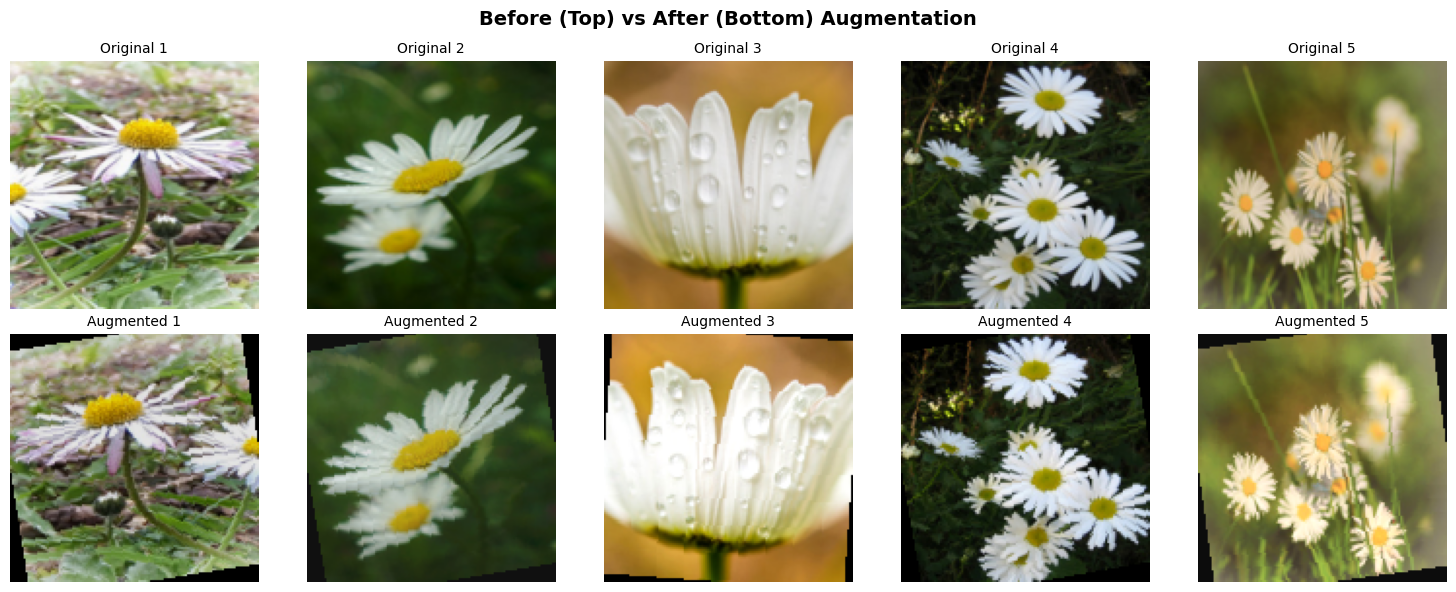

✅ Compare the original images (top) with augmented versions (bottom)!


In [39]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# Define augmentation pipeline (same as above)
augmentation_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.2),
])

# Basic transform (no augmentation)
basic_transform = transforms.Resize((128, 128))

# Load 5 sample images
sample_images = [Image.open(image_files[i]) for i in range(5)]

# Create 2x5 grid (top row: original, bottom row: augmented)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(5):
    # Original image
    original = basic_transform(sample_images[i])
    axes[0, i].imshow(original)
    axes[0, i].set_title(f"Original {i+1}", fontsize=10)
    axes[0, i].axis('off')
    
    # Augmented image
    augmented = augmentation_transform(sample_images[i])
    axes[1, i].imshow(augmented)
    axes[1, i].set_title(f"Augmented {i+1}", fontsize=10)
    axes[1, i].axis('off')

plt.suptitle("Before (Top) vs After (Bottom) Augmentation", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Compare the original images (top) with augmented versions (bottom)!")

## **🔹 Now You Know How to Split into Train and Test!**
To create training and testing datasets, we **split the image paths** and create **two datasets and two dataloaders**.


## 📌 **Another easier approach for datasets organized in subfolders**

When working with **image classification datasets** organized in subfolders, **`ImageFolder`** is a great **built-in PyTorch dataset loader** that automatically assigns labels based on folder names.

---

**Dataset Structure Expected by `ImageFolder`:**
```
Dataset/
│── Class_A/
│   │── image_1.jpg
│   │── image_2.jpg
│── Class_B/
│   │── image_3.jpg
│   │── image_4.jpg
```
- **Class names (folder names) become labels** (`Class_A = 0`, `Class_B = 1`)
- **No need to manually extract file paths and labels!**

---






Given our dataset here follow this structure, we can, instead of writing a custom `Dataset` class, **directly load images** using `ImageFolder`!

In [20]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import os

# Define transformations
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images
    transforms.RandomRotation(15),  # Rotate images randomly within ±15 degrees
    transforms.ColorJitter(brightness=0.2),  # Adjust brightness randomly
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  # value for each channel
])

# Validation and testing data typically don’t require augmentations, as we only evaluate the model performance on these sets.
# Instead, we apply basic transformations to prepare the images.
transform_valid_test = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
])


# Initialize dataset for Train
train_path = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Train")
test_path = os.path.join(path, "Skin cancer ISIC The International Skin Imaging Collaboration", "Test")

train_dataset = ImageFolder(train_path, transform=transform)                                                    ## Replaced SkinCancerDataset with ImageFolder
test_dataset = ImageFolder(test_path, transform=transform_valid_test)                                           ## Replaced SkinCancerDataset with ImageFolder

# Create DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Get a batch of training images
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels}")

Batch shape: torch.Size([32, 3, 64, 64]), Labels: tensor([1, 5, 6, 1, 1, 1, 0, 7, 8, 5, 4, 5, 2, 4, 3, 5, 1, 4, 4, 8, 5, 1, 0, 1,
        5, 1, 1, 4, 1, 8, 3, 4])


#### That's it! No need for a custom dataset class here!

# **📌 Handling Datasets with Non-Standard Structures**
Sometimes, datasets are structured in **non-standard ways**, making it harder to assign labels directly from folder names.  


### **Example: Weird Dataset Structure**
In this case, instead of having separate folders for `smoking` and `notsmoking`, the filenames themselves indicate the class:

```
Smoking_Dataset/
│── Training/
│   │── Training/
│   │   │── notsmoking_0006.jpg
│   │   │── smoking_0007.jpg
│── Validation/
│   │── Validation/
│   |   │── notsmoking_0012.jpg
│   |   │── smoking_0015.jpg
│── Testing/
│   │── Testing/
│   |   │── notsmoking_0032.jpg
│   |   │── smoking_0034.jpg
```

---

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sujaykapadnis/smoking")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/smoking


- Let's extract the labels outside the dataset class for simplicity

In [22]:
import os
import glob
from tqdm import tqdm

# Define dataset path
dataset_path = os.path.join(path, "Training", "Training")
# Get all image paths
train_image_paths = glob.glob(f"{dataset_path}/*.jpg")

# Define dataset path
dataset_path = os.path.join(path, "Validation", "Validation")
# Get all image paths
valid_image_paths = glob.glob(f"{dataset_path}/*.jpg")

# Define dataset path
dataset_path = os.path.join(path, "Testing", "Testing")
# Get all image paths
test_image_paths = glob.glob(f"{dataset_path}/*.jpg")


train_labels = []
valid_labels = []
test_labels = []

for path in tqdm(train_image_paths):
    prefix  = path.split("/")[-1].split("_")[0]                 # "./Training/smoking_0007.jpg" → "smoking_0007.jpg"  → "smoking"
    label = 1 if prefix == "smoking" else 0                     # Assign label
    train_labels.append(label)                                  # Store label

for path in tqdm(valid_image_paths):
    prefix = path.split("/")[-1].split("_")[0]
    label = 1 if prefix == "smoking" else 0
    valid_labels.append(label)

for path in tqdm(test_image_paths):
    prefix = path.split("/")[-1].split("_")[0]
    label = 1 if prefix == "smoking" else 0
    test_labels.append(label)

100%|██████████| 224/224 [00:00<00:00, 569753.85it/s]


✅ Now, image paths and labels are ready for the dataset class! 🎯

In [23]:
from torch.utils.data import Dataset
from PIL import Image

class SmokingDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths  # List of image paths
        self.labels = labels  # Corresponding labels
        self.transform = transform  # Transformations to apply

    def __len__(self):
        return len(self.image_paths)  # Total number of images

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]  # Get image path
        label = self.labels[idx]  # Get corresponding label
        
        # Load image
        image = Image.open(image_path)

        # Apply transformations (if any)
        if self.transform:
            image = self.transform(image)

        return image, label  # Return processed image and its label

In [24]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.RandomRotation(15),  
    transforms.ColorJitter(brightness=0.2),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  
])


transform_valid_test = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),  
])

# Initialize datasets
train_dataset = SmokingDataset(train_image_paths, train_labels, transform=transform)
valid_dataset = SmokingDataset(valid_image_paths, valid_labels, transform=transform_valid_test)
test_dataset = SmokingDataset(test_image_paths, test_labels, transform=transform_valid_test)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Get a batch of training images
images, labels = next(iter(train_loader))
print(f"Batch shape: {images.shape}, Labels: {labels}")

Batch shape: torch.Size([32, 3, 224, 224]), Labels: tensor([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0])


## **📌 Final Note: Data Formats Can Vary**
When working with datasets, **the structure may differ** based on how the labels are stored.  

✅ **Common ways labels are provided**:
- **Folder names** → Each folder represents a class (as we saw).
- **CSV file** → Labels are stored in a `data.csv` file with filenames.
- **JSON file** → Labels are stored in a `labels.json` file.
- **Separate annotation files** → Some datasets use `.txt` or `.xml` annotations.

### **🔹 How to Handle This?**
✅ **Always explore the dataset structure first** before writing code.  
✅ Check:
- 📂 **Are images inside class folders?**
- 📄 **Is there a CSV/JSON file with labels?**
- 🔄 **Do filenames contain class names?**

Once you understand the dataset, **write the correct logic to retrieve paths and labels.**  


---

## **🌳 Augmentation Decision Tree: Which Augmentation Should I Use?**

Not all augmentations work for all types of images! Here's a quick guide:

```
Start: What type of images do I have?
│
├─ Natural scenes (landscapes, animals, objects)
│   → ✅ Use: Rotation, Horizontal Flip, ColorJitter, RandomCrop
│   → ❌ Avoid: Vertical Flip (unless makes sense), extreme rotations
│
├─ Medical images (X-rays, MRI, CT scans)
│   → ✅ Use: Light rotation (±5-10°), slight brightness adjustment
│   → ❌ Avoid: Flips (unless anatomically valid), color changes, heavy blur
│
├─ Satellite/Aerial images
│   → ✅ Use: Rotation (any angle), Horizontal/Vertical Flip
│   → ❌ Avoid: Color changes (preserves spectral information)
│
├─ Faces/People
│   → ✅ Use: Horizontal Flip, slight rotation (±10°), brightness
│   → ❌ Avoid: Vertical Flip, extreme rotations, heavy crops
│
└─ Text/OCR/Documents
    → ✅ Use: Slight blur, brightness adjustment
    → ❌ Avoid: Rotation, Flip, cropping (destroys text structure)
```

### **Domain-Specific Recommendations:**

| Image Type | Light Augmentation | Moderate | Heavy |
|------------|-------------------|----------|-------|
| **Natural Images** | Flip, slight rotation | + ColorJitter, Crop | + Strong ColorJitter, Blur |
| **Medical** | Brightness ±10% | + Rotation ±5° | ❌ Don't use heavy |
| **Satellite** | Flip, Rotate 90° | + Any rotation | + Noise, Blur |
| **Faces** | Horizontal Flip | + Rotation ±15°, Crop | + ColorJitter |
| **Documents** | Brightness ±5% | + Slight blur | ❌ Don't use heavy |


---

# **📌 Exercise: Build a Dataset Class for Horse Breeds**

https://www.kaggle.com/datasets/olgabelitskaya/horse-breeds

In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olgabelitskaya/horse-breeds")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/horse-breeds


#### Optional: You can explore more datasets types like TensorDataset, StackDataset here: [Link](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset)

### Contributed by: Mohamed Eltayeb

#### Edited by: Abdulellah Mojalled

![image.png](https://i.imgur.com/a3uAqnb.png)